In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve
from scikitplot.metrics import plot_roc, plot_precision_recall, cumulative_gain_curve
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [163]:
sns.reset_defaults()

In [2]:
df_train=pd.read_csv('Train_numeric_cat.csv', index_col=0)
df_test=pd.read_csv('Test_numeric_cat.csv', index_col=0)



In [3]:
df_train.drop(['modality', 'actor','repetition', 'filename'], axis=1, inplace=True)

df_test.drop(['modality', 'actor','repetition', 'filename'], axis=1, inplace=True)

In [4]:
vc_map= {'speech':0, 'song':1}
emo_int_map={'normal':0, 'strong':1}
state_map= {'Kids are talking by the door':0,'Dogs are sitting by the door':1}
sex_map={'M':0, 'F':1}
emo_map={'angry':0,'calm':1,'disgust':2, 'fearful':3, 'happy':4, 
'neutral': 5, 'sad':6, 'surprised':7  }

df_train.replace({'vocal_channel':vc_map,'emotional_intensity':emo_int_map,
'emotion':emo_map, 'statement':state_map,'sex':sex_map },inplace=True)

df_test.replace({'vocal_channel':vc_map,'emotional_intensity':emo_int_map,
'emotion':emo_map, 'statement':state_map,'sex':sex_map },inplace=True)

In [5]:
x_train=df_train.drop('emotion', axis=1)
x_test= df_test.drop('emotion', axis=1)
y_train= df_train['emotion']
y_test= df_test['emotion']

In [6]:
%store -r clf_b

## Base ADA

In [159]:
sc=StandardScaler()
x_train_norm= sc.fit_transform(x_train)
x_test_norm= sc.transform(x_test)

In [173]:
base_clf= AdaBoostClassifier()
base_clf.fit(x_train_whole,y_train_whole)
y_pred_base = base_clf.predict(x_test_whole)

print('Accuracy %s' % accuracy_score(y_test_whole, y_pred_base))
print('Train accuracy', accuracy_score(y_train_whole, base_clf.predict(x_train_whole)))
print(classification_report(y_test_whole, y_pred_base))

Accuracy 0.3269230769230769
Train accuracy 0.40077821011673154
              precision    recall  f1-score   support

           0       0.31      0.70      0.43        96
           1       0.34      0.55      0.42        96
           2       0.26      0.19      0.22        48
           3       0.33      0.23      0.27        96
           4       0.32      0.10      0.16        96
           5       0.45      0.19      0.26        48
           6       0.35      0.29      0.32        96
           7       0.25      0.12      0.17        48

    accuracy                           0.33       624
   macro avg       0.33      0.30      0.28       624
weighted avg       0.33      0.33      0.30       624



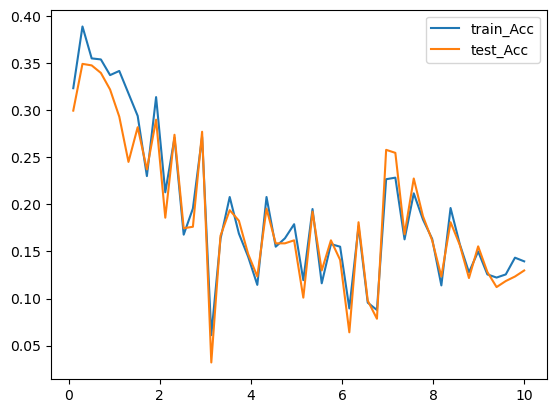

In [165]:
learning_rates= np.linspace(0.1, 10, 50)
test=[]
train =[]


for rate in learning_rates:
    clf_trial=AdaBoostClassifier(learning_rate=rate, n_estimators=10)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(learning_rates, train, label= 'train_Acc')
plt.plot(learning_rates, test, label= 'test_Acc')
plt.legend()


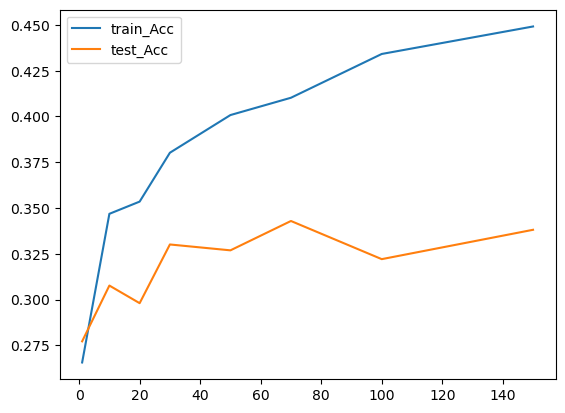

In [166]:
estimators= [1,10,20,30,50,70,100,150]
test=[]
train =[]


for n in estimators:
    clf_trial=AdaBoostClassifier(n_estimators=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(estimators, train, label= 'train_Acc')
plt.plot(estimators, test, label= 'test_Acc')
plt.legend()


## ADA with a personalized tree

In [16]:
tree_=DecisionTreeClassifier()
tree_.fit(x_train, y_train)



DecisionTreeClassifier()

In [17]:
y_pred_tree = tree_.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_tree))
print('Train accuracy', accuracy_score(y_train, tree_.predict(x_train)))
print(classification_report(y_test, y_pred_tree))

Accuracy 0.33814102564102566
Train accuracy 1.0
              precision    recall  f1-score   support

           0       0.42      0.62      0.50        96
           1       0.51      0.42      0.46        96
           2       0.35      0.40      0.37        48
           3       0.24      0.20      0.22        96
           4       0.27      0.30      0.29        96
           5       0.19      0.17      0.18        48
           6       0.21      0.16      0.18        96
           7       0.42      0.44      0.43        48

    accuracy                           0.34       624
   macro avg       0.33      0.34      0.33       624
weighted avg       0.33      0.34      0.33       624



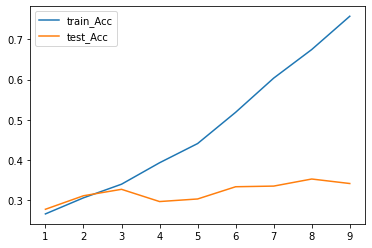

In [21]:
max_depth=list(range(1,10))
test=[]
train =[]


for n in max_depth:
    clf_trial=DecisionTreeClassifier(max_depth=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(max_depth, train, label= 'train_Acc')
plt.plot(max_depth, test, label= 'test_Acc')
plt.legend()

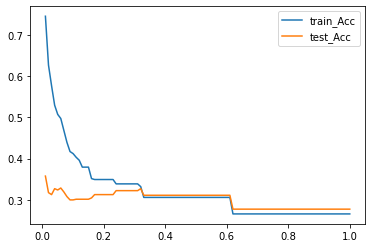

In [28]:
samples_split=np.linspace(0.01,1, 100)
test=[]
train =[]


for n in samples_split:
    clf_trial=DecisionTreeClassifier(min_samples_split=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(samples_split, train, label= 'train_Acc')
plt.plot(samples_split, test, label= 'test_Acc')
plt.legend()

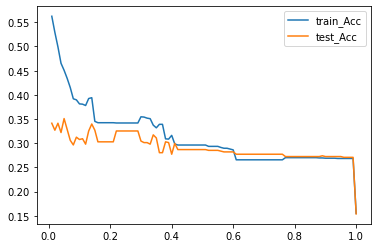

In [30]:
samples_leaf=np.linspace(0.01,0.5, 100)
test=[]
train =[]


for n in samples_leaf:
    clf_trial=DecisionTreeClassifier(min_samples_leaf=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(samples_split, train, label= 'train_Acc')
plt.plot(samples_split, test, label= 'test_Acc')
plt.legend()

In [31]:
param={
    'criterion':['gini', 'entropy'],
    'max_depth': list(range(1,6)),
    'min_samples_split': np.linspace(0.2,0.4,5),
    'min_samples_leaf': np.linspace(0.1,0.4,10)
}

grid= GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid=param, 
    n_jobs=-1,
    cv=RepeatedStratifiedKFold(n_repeats=5),
    refit=True)


In [32]:
grid.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': array([0.1       , 0.13333333, 0.16666667, 0.2       , 0.23333333,
       0.26666667, 0.3       , 0.33333333, 0.36666667, 0.4       ]),
                         'min_samples_split': array([0.2 , 0.25, 0.3 , 0.35, 0.4 ])})

In [35]:
print(grid.best_estimator_, grid.best_score_)
good_tree=grid.best_estimator_


DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, min_samples_split=0.2) 0.32295233673785206


In [50]:
adatree=AdaBoostClassifier(good_tree, n_estimators=20, learning_rate=0.3)
adatree.fit(x_train,y_train)

print('train acc : ', accuracy_score(y_train, adatree.predict(x_train)))
print('test acc : ', accuracy_score(y_test, adatree.predict(x_test)))
print(classification_report(y_test, adatree.predict(x_test)))

train acc :  0.5241801000555865
test acc :  0.38461538461538464
              precision    recall  f1-score   support

           0       0.51      0.70      0.59        96
           1       0.44      0.27      0.34        96
           2       0.39      0.40      0.39        48
           3       0.42      0.29      0.35        96
           4       0.31      0.49      0.38        96
           5       0.50      0.15      0.23        48
           6       0.28      0.34      0.31        96
           7       0.35      0.27      0.31        48

    accuracy                           0.38       624
   macro avg       0.40      0.36      0.36       624
weighted avg       0.40      0.38      0.37       624



In [8]:
good_tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, min_samples_split=0.2)

In [9]:
adatree=AdaBoostClassifier(good_tree, n_estimators=20, learning_rate=0.3)

In [10]:
%%timeit
adatree.fit(x_train,y_train)

1.5 s ± 95.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


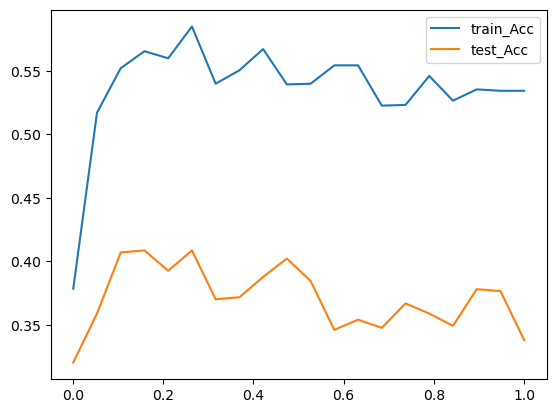

In [176]:
learning_rates= np.linspace(0.001, 1, 20)
test=[]
train =[]


for rate in learning_rates:
    clf_trial=AdaBoostClassifier(good_tree, learning_rate=rate)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(learning_rates, train, label= 'train_Acc')
plt.plot(learning_rates, test, label= 'test_Acc')
plt.legend()


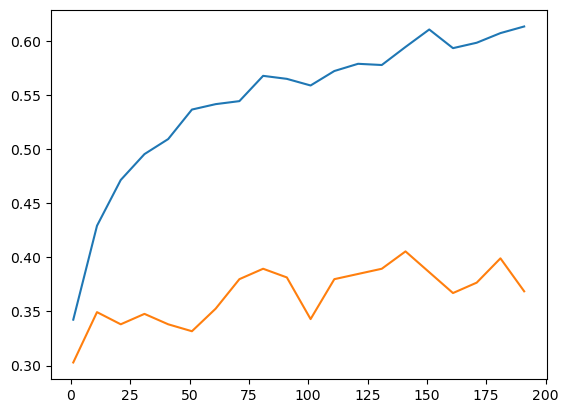

In [175]:
n_estimators=list(range(1,200, 10))
test=[]
train =[]


for n in n_estimators:
    clf_trial=AdaBoostClassifier(good_tree,  n_estimators=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(n_estimators, train, label= 'train_Acc')
plt.plot(n_estimators, test, label= 'test_Acc')


In [178]:
param_grid={
    'n_estimators': [75, 80, 90, 100, 110, 120, 150],
    'learning_rate' : np.linspace(0.001, 1, 10)
    
    }

grid=GridSearchCV(
    AdaBoostClassifier(good_tree),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(),
    n_jobs=-1,
    refit=True
)

grid.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                                min_samples_leaf=0.1,
                                                                                min_samples_split=0.2)),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                         'n_estimators': [75, 80, 90, 100, 110, 120, 150]})

In [179]:
print(grid.best_estimator_, grid.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_leaf=0.1,
                                                         min_samples_split=0.2),
                   learning_rate=0.334, n_estimators=150) 0.4375762921696069


In [180]:
best_ada=grid.best_estimator_

print('train acc : ', accuracy_score(y_train, best_ada.predict(x_train)))
print('test acc : ', accuracy_score(y_test, best_ada.predict(x_test)))
print(classification_report(y_test, best_ada.predict(x_test)))

train acc :  0.5786548082267927
test acc :  0.38782051282051283
              precision    recall  f1-score   support

           0       0.48      0.71      0.57        96
           1       0.43      0.21      0.28        96
           2       0.35      0.38      0.36        48
           3       0.46      0.23      0.31        96
           4       0.29      0.45      0.35        96
           5       0.45      0.19      0.26        48
           6       0.33      0.48      0.39        96
           7       0.57      0.33      0.42        48

    accuracy                           0.39       624
   macro avg       0.42      0.37      0.37       624
weighted avg       0.41      0.39      0.37       624



In [86]:
df_train_whole=pd.read_csv('RavdessAudioOnlyFeatures_TRAIN.csv')
df_test_whole=pd.read_csv('RavdessAudioOnlyFeatures_TEST.csv')

df_train_whole.drop(['modality', 'actor','repetition', 'filename'], axis=1, inplace=True)

df_test_whole.drop(['modality', 'actor','repetition', 'filename'], axis=1, inplace=True)

vc_map= {'speech':0, 'song':1}
emo_int_map={'normal':0, 'strong':1}
state_map= {'Kids are talking by the door':0,'Dogs are sitting by the door':1}
sex_map={'M':0, 'F':1}
emo_map={'angry':0,'calm':1,'disgust':2, 'fearful':3, 'happy':4, 
'neutral': 5, 'sad':6, 'surprised':7  }

df_train.replace({'vocal_channel':vc_map,'emotional_intensity':emo_int_map,
'emotion':emo_map, 'statement':state_map,'sex':sex_map },inplace=True)

df_test.replace({'vocal_channel':vc_map,'emotional_intensity':emo_int_map,
'emotion':emo_map, 'statement':state_map,'sex':sex_map },inplace=True)

x_train_whole=df_train.drop('emotion', axis=1)
x_test_whole= df_test.drop('emotion', axis=1)
y_train_whole= df_train['emotion']
y_test_whole= df_test['emotion']


In [89]:
best_ada.fit(x_train_whole, y_train_whole)
print(accuracy_score(y_train_whole, best_ada.predict(x_train_whole)))
print(classification_report(y_test_whole, best_ada.predict(x_test_whole)))

0.48249027237354086
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        96
           1       0.47      0.39      0.43        96
           2       0.50      0.35      0.41        48
           3       0.38      0.22      0.28        96
           4       0.30      0.56      0.39        96
           5       0.38      0.12      0.19        48
           6       0.32      0.22      0.26        96
           7       0.27      0.40      0.32        48

    accuracy                           0.39       624
   macro avg       0.39      0.37      0.36       624
weighted avg       0.40      0.39      0.37       624



In [188]:
sns.reset_defaults()

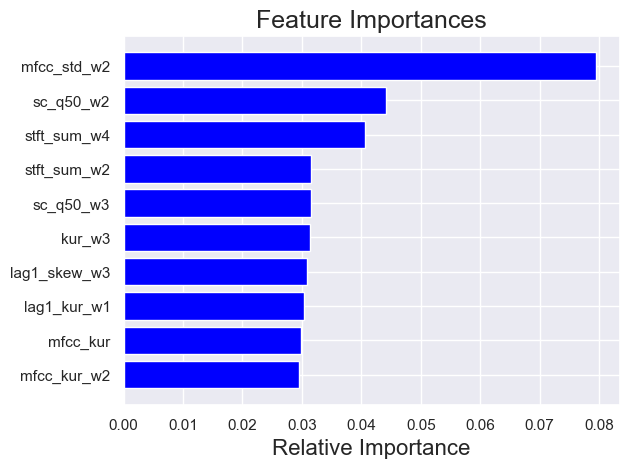

In [213]:
sns.set()

features = x_train.columns
importances = best_ada.feature_importances_
indices = np.argsort(importances)[len(importances)-10 : len(importances)]


plt.title('Feature Importances', fontsize=18)
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=16)
plt.show()

In [207]:
importances

array([0.00463518, 0.01234143, 0.        , 0.00218554, 0.0136388 ,
       0.01521961, 0.00802771, 0.01152344, 0.0298708 , 0.01333275,
       0.01140022, 0.00686605, 0.00380145, 0.03029165, 0.0177833 ,
       0.01828384, 0.02348895, 0.01680097, 0.02881077, 0.02802695,
       0.07947687, 0.01671229, 0.01115071, 0.01102897, 0.02959586,
       0.01503702, 0.01651099, 0.00532637, 0.04422908, 0.01311356,
       0.00525518, 0.00795651, 0.03156648, 0.03135728, 0.0308849 ,
       0.01522693, 0.00600294, 0.01638197, 0.02789346, 0.01550288,
       0.01723849, 0.0106205 , 0.01215612, 0.00568077, 0.03155769,
       0.00465408, 0.01957885, 0.01142982, 0.01125361, 0.01664299,
       0.00595266, 0.00788861, 0.01705821, 0.00816975, 0.00909581,
       0.01171366, 0.01964377, 0.04058449, 0.01254045])

In [208]:
np.argsort(importances)

array([ 2,  3, 12,  0, 45, 30, 27, 43, 50, 36, 11, 51, 31,  6, 53, 54, 41,
       23, 22, 48, 10, 47,  7, 55, 42,  1, 58, 29,  9,  4, 25,  5, 35, 39,
       37, 26, 49, 21, 17, 52, 40, 14, 15, 46, 56, 16, 38, 19, 18, 24,  8,
       13, 34, 33, 44, 32, 57, 28, 20], dtype=int64)

In [141]:
importances[indices]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00310015,
       0.00313541, 0.00347003, 0.00385445, 0.00435459, 0.0054818 ,
       0.00588456, 0.00700303, 0.00702684, 0.00754212, 0.00761197,
       0.00790976, 0.01166599, 0.01234256, 0.012597  , 0.01451086,
       0.01459899, 0.01636948, 0.01801901, 0.01996369, 0.02035376,
       0.02292796, 0.02792732, 0.02837651, 0.03282323, 0.03499538,
       0.03641028, 0.03927132, 0.03998557, 0.04401692, 0.04410756,
       0.06565151, 0.09149164, 0.09207886, 0.19313989])

In [129]:
len(bestf)

35

In [108]:

np.unique(importances, return_counts=True)

(array([0.        , 0.00310015, 0.00313541, 0.00347003, 0.00385445,
        0.00435459, 0.0054818 , 0.00588456, 0.00700303, 0.00702684,
        0.00754212, 0.00761197, 0.00790976, 0.01166599, 0.01234256,
        0.012597  , 0.01451086, 0.01459899, 0.01636948, 0.01801901,
        0.01996369, 0.02035376, 0.02292796, 0.02792732, 0.02837651,
        0.03282323, 0.03499538, 0.03641028, 0.03927132, 0.03998557,
        0.04401692, 0.04410756, 0.06565151, 0.09149164, 0.09207886,
        0.19313989]),
 array([24,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1], dtype=int64))

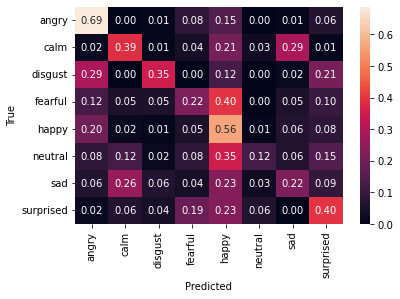

In [52]:
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

conf_m=confusion_matrix(y_test, best_ada.predict(x_test), normalize='true')
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

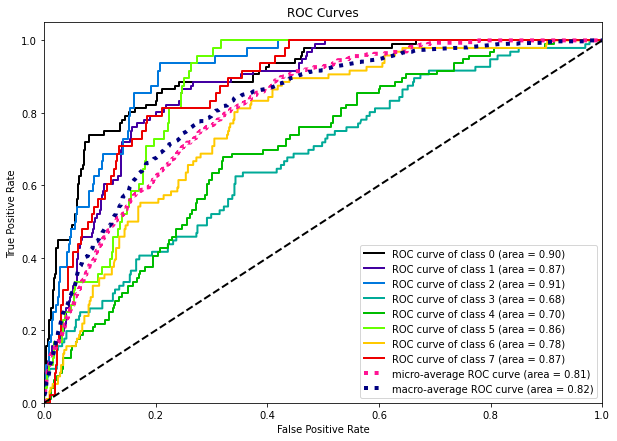

In [54]:
plt.rcParams["figure.figsize"] = (10,7)

plot_roc(y_test, best_ada.predict_proba(x_test), )

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

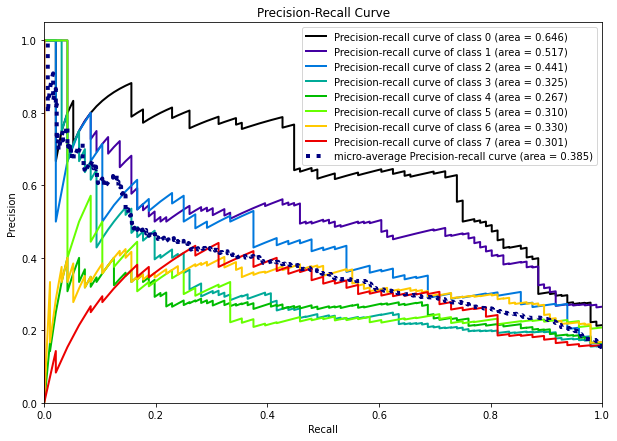

In [57]:
plot_precision_recall(y_test, best_ada.predict_proba(x_test))

In [83]:
tpr, fpr, thresholds =roc_curve(y_test, best_ada.predict(x_test), pos_label=0)
fpr

array([0.        , 0.0625    , 0.07291667, 0.07291667, 0.21875   ,
       0.30208333, 0.3125    , 0.3125    , 1.        ])

let's compute the youden j statistic, which is j= sensitivity + specificity -1 --> tpr - fpr

In [84]:

j = tpr - fpr
best_t = thresholds[np.argmax(j)]
best_t

1

## ADABOOST with best logistic


In [11]:
clf = AdaBoostClassifier(base_estimator= clf_b, n_estimators=20, random_state=0, learning_rate=0.01)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('Train accuracy', accuracy_score(y_train, clf.predict(x_train)))
print(classification_report(y_test, y_pred))

Accuracy 0.34615384615384615
Train accuracy 0.3979988882712618
              precision    recall  f1-score   support

           0       0.40      0.62      0.49        96
           1       0.33      0.54      0.41        96
           2       0.48      0.23      0.31        48
           3       0.44      0.29      0.35        96
           4       0.28      0.29      0.28        96
           5       0.33      0.29      0.31        48
           6       0.22      0.12      0.16        96
           7       0.35      0.23      0.28        48

    accuracy                           0.35       624
   macro avg       0.35      0.33      0.32       624
weighted avg       0.35      0.35      0.33       624



In [14]:
from sklearn.dummy import DummyClassifier

In [16]:
dummy=DummyClassifier()


In [17]:
%%timeit
dummy.fit(x_train, y_train)

343 µs ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
print(classification_report(y_test, dummy.predict(x_test)))
print(accuracy_score(y_train, dummy.predict(x_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        96
           4       0.15      1.00      0.27        96
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        96
           7       0.00      0.00      0.00        48

    accuracy                           0.15       624
   macro avg       0.02      0.12      0.03       624
weighted avg       0.02      0.15      0.04       624

0.15508615897720957


c:\Users\valif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1111, max_iter=10000,
                                                     penalty='l1',
                                                     random_state=44,
                                                     solver='liblinear'),
                   learning_rate=0.01, n_estimators=20, random_state=0)

In [12]:
%%timeit
clf.fit(x_train, y_train)

12.8 s ± 485 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


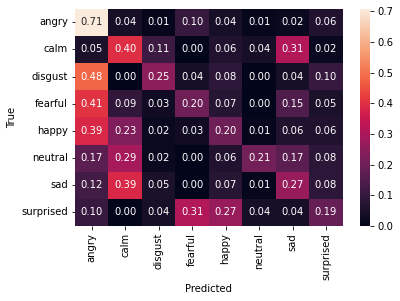

In [8]:
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

conf_m=confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

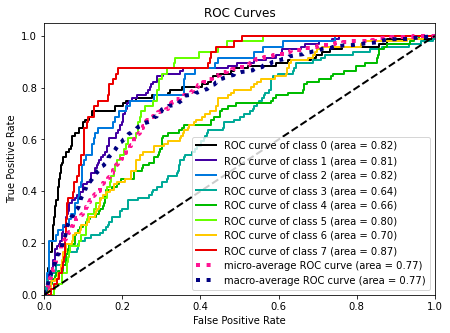

In [17]:
plt.rcParams["figure.figsize"] = (7,5)
plot_roc(y_test, clf.predict_proba(x_test))

In [25]:
np.linspace(1,100, 5).tolist()

[1.0, 25.75, 50.5, 75.25, 100.0]

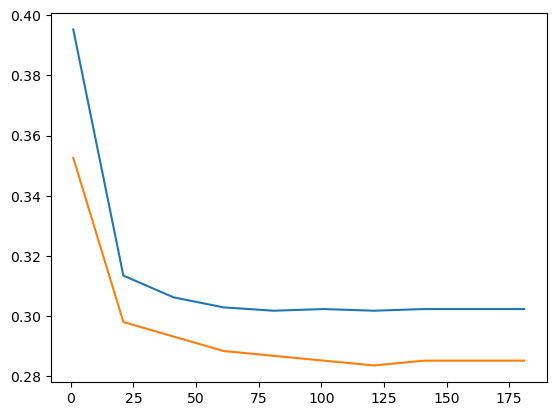

In [182]:
# change n_estimators
n_estimators=list(range(1,200, 20))
test=[]
train =[]


for n in n_estimators:
    clf_trial=AdaBoostClassifier(clf_b, n_estimators=n)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(n_estimators, train, label= 'train_Acc')
plt.plot(n_estimators, test, label= 'test_Acc')


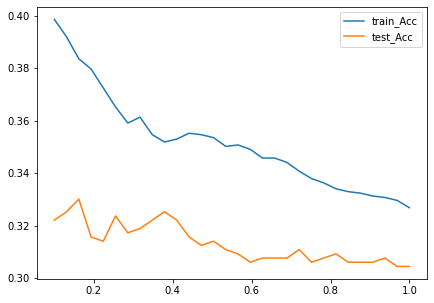

In [30]:
learning_rates= np.linspace(0.1, 1, 30)
test=[]
train =[]


for rate in learning_rates:
    clf_trial=AdaBoostClassifier(clf_b, learning_rate=rate, n_estimators=10)
    clf_trial.fit(x_train, y_train)
    test.append(accuracy_score(y_test, clf_trial.predict(x_test)))
    train.append(accuracy_score(y_train, clf_trial.predict(x_train)))


plt.plot(learning_rates, train, label= 'train_Acc')
plt.plot(learning_rates, test, label= 'test_Acc')
plt.legend()


In [32]:
param_grid={
    'n_estimators': [2, 5, 10, 20],
    'learning_rate' : np.linspace(0.001, 0.1, 8), 
    'algorithm': ['SAMME', 'SAMME.R']
    }

grid=GridSearchCV(
    AdaBoostClassifier(clf_b),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_repeats=5),
    n_jobs=-1,
    refit=True
)

grid.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1111,
                                                                            max_iter=10000,
                                                                            penalty='l1',
                                                                            random_state=44,
                                                                            solver='liblinear')),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.001     , 0.01514286, 0.02928571, 0.04342857, 0.05757143,
       0.07171429, 0.08585714, 0.1       ]),
                         'n_estimators': [2, 5, 10, 20]})

In [33]:
opt_clf=grid.best_estimator_
print(grid.best_params_,grid.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.05757142857142857, 'n_estimators': 10} 0.3799873104302074


In [34]:
accuracy_score(y_test, opt_clf.predict(x_test))

0.328525641025641